In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [62]:
start="2015-01-01"
end="2022-10-31"

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.839495
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.603207
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.910093
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.912348
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.247646


In [63]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-25,152.490005,149.360001,150.089996,152.339996,74732300.0,152.087708
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.102661
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.560196
2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.482086
2022-10-31,154.240005,151.919998,153.160004,153.339996,97943200.0,153.086044


In [64]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.839495
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.603207
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.910093
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.912348
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.247646


In [65]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0


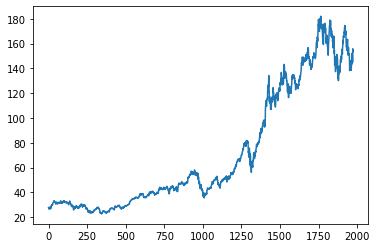

In [66]:
plt.plot(df.Close)

In [67]:
df

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0
...,...,...,...,...,...
1968,152.490005,149.360001,150.089996,152.339996,74732300.0
1969,151.990005,148.039993,150.960007,149.350006,88194300.0
1970,149.050003,144.130005,148.070007,144.800003,109180200.0
1971,157.500000,147.820007,148.199997,155.740005,164762400.0


In [68]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1968    151.2273
1969    151.2670
1970    151.2536
1971    151.3239
1972    151.3777
Name: Close, Length: 1973, dtype: float64

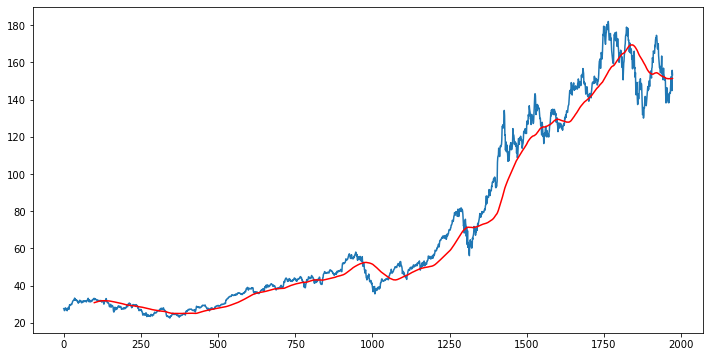

In [69]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [70]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1968    157.10725
1969    156.99305
1970    156.84165
1971    156.74270
1972    156.64845
Name: Close, Length: 1973, dtype: float64

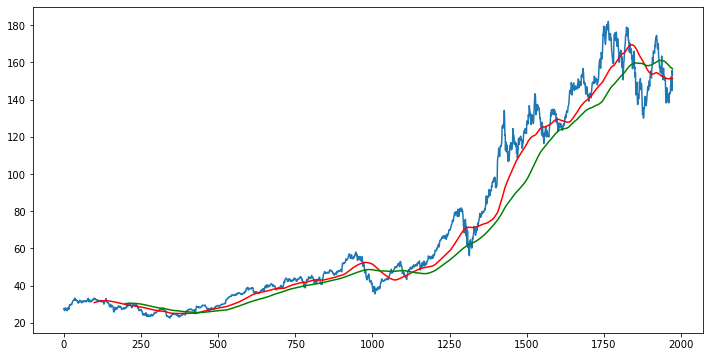

In [71]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [72]:
df.shape

(1973, 5)

In [73]:
# Spliting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1381, 1)
(592, 1)


In [74]:
data_training.head()

,Close
0,27.594999
1,27.332500
2,26.562500
3,26.565001
4,26.937500


In [75]:
data_testing.head()

,Close
1381,88.407501
1382,90.445000
1383,91.199997
1384,91.027496
1385,91.027496


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [77]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07255875],
       [0.06875703],
       [0.05760528],
       ...,
       [1.        ],
       [0.97657409],
       [0.99388102]])

In [78]:
data_training_array.shape

(1381, 1)

In [79]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i ,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [81]:
x_train.shape

(1281, 100, 1)

In [39]:
# ML Model

In [80]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [83]:
model=Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [86]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
41/41 [==============================] - 12s 160ms/step - loss: 0.0338
Epoch 2/50
41/41 [==============================] - 6s 155ms/step - loss: 0.0097
Epoch 3/50
41/41 [==============================] - 7s 159ms/step - loss: 0.0075
Epoch 4/50
41/41 [==============================] - 6s 158ms/step - loss: 0.0060
Epoch 5/50
41/41 [==============================] - 7s 164ms/step - loss: 0.0047
Epoch 6/50
41/41 [==============================] - 7s 175ms/step - loss: 0.0068
Epoch 7/50
41/41 [==============================] - 7s 175ms/step - loss: 0.0050
Epoch 8/50
41/41 [==============================] - 7s 178ms/step - loss: 0.0049
Epoch 9/50
41/41 [==============================] - 9s 217ms/step - loss: 0.0045
Epoch 10/50
41/41 [==============================] - 9s 224ms/step - loss: 0.0038
Epoch 11/50
41/41 [==============================] - 10s 237ms/step - loss: 0.0059
Epoch 12/50
41/41 [==============================] - 9s 227ms/step - loss: 0.0040
Epoch 13/50
41/41 [====

In [87]:
model.save('keras_model.h5')

In [88]:
data_testing.head()

,Close
1381,88.407501
1382,90.445000
1383,91.199997
1384,91.027496
1385,91.027496


In [91]:
data_training.tail(100)

,Close
1281,79.712502
1282,80.362503
1283,81.302498
1284,80.007500
1285,80.387497
...,...
1376,87.430000
1377,89.717499
1378,91.632500
1379,90.014999


In [92]:
past_100_days=data_training.tail(100)

In [95]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_17668\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [96]:
final_df.head()

,Close
0,79.712502
1,80.362503
2,81.302498
3,80.007500
4,80.387497


In [97]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.1013759 ],
       [0.04737229],
       [0.1064189 ],
       [0.03542004],
       [0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.0419918 ],
       [0.06764351],
       [0.04639945],
       [0.0604364 ],
       [0.05940397],
       [0.03283898],
       [0.04082037],
       [0.03383169],
       [0.07564478],
       [0.06960907],
       [0.08279233],
       [0.08660432],
       [0.097

In [98]:
input_data.shape

(692, 1)

In [99]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [100]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(592, 100, 1)
(592,)


In [101]:
# Making Predictions

y_predicted=model.predict(x_test)

19/19 [==============================] - 1s 40ms/step


In [102]:
y_predicted.shape

(592, 1)

In [103]:
y_test

array([0.25663632, 0.27281754, 0.2788135 , 0.27744355, 0.27744355,
       0.29678165, 0.29447855, 0.31171204, 0.31496817, 0.31629838,
       0.31278419, 0.32533211, 0.33063316, 0.32108326, 0.31953463,
       0.33565629, 0.32487544, 0.32703954, 0.29187765, 0.29005103,
       0.30748307, 0.2951139 , 0.30930969, 0.31844267, 0.39841567,
       0.41967958, 0.42545718, 0.428614  , 0.45911013, 0.43695282,
       0.44977866, 0.42315407, 0.4520222 , 0.46790562, 0.46709158,
       0.46470905, 0.47229339, 0.47344491, 0.49383529, 0.54224001,
       0.55405326, 0.54585344, 0.55933451, 0.5473227 , 0.54571451,
       0.57932771, 0.62014809, 0.59807015, 0.5145234 , 0.51515875,
       0.45051326, 0.48625094, 0.45583419, 0.44400106, 0.4706852 ,
       0.47211471, 0.44503346, 0.43081779, 0.40302181, 0.42875299,
       0.44249211, 0.40524554, 0.41398141, 0.44622473, 0.46750851,
       0.4605992 , 0.47425895, 0.48204185, 0.45210157, 0.47973874,
       0.45321347, 0.46846153, 0.46758794, 0.48347136, 0.54247

In [104]:
y_predicted

array([[0.2514664 ],
       [0.2558292 ],
       [0.2597759 ],
       [0.26327142],
       [0.26631457],
       [0.268918  ],
       [0.27124846],
       [0.27340713],
       [0.27550477],
       [0.27766842],
       [0.2799626 ],
       [0.28238213],
       [0.28496078],
       [0.28777426],
       [0.29077822],
       [0.29383388],
       [0.29691482],
       [0.29989782],
       [0.3026624 ],
       [0.30480328],
       [0.3060044 ],
       [0.30627185],
       [0.30570227],
       [0.3045231 ],
       [0.30302498],
       [0.3018938 ],
       [0.3021261 ],
       [0.30461144],
       [0.3098551 ],
       [0.31810808],
       [0.32903478],
       [0.3421083 ],
       [0.35621494],
       [0.37056082],
       [0.38471577],
       [0.3983237 ],
       [0.4110003 ],
       [0.42248762],
       [0.4325926 ],
       [0.44146663],
       [0.4499388 ],
       [0.458845  ],
       [0.4685638 ],
       [0.47924447],
       [0.49051675],
       [0.5017522 ],
       [0.51281524],
       [0.524

In [105]:
scaler.scale_

array([0.00794171])

In [107]:
scale_factor = 1/0.00794171
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

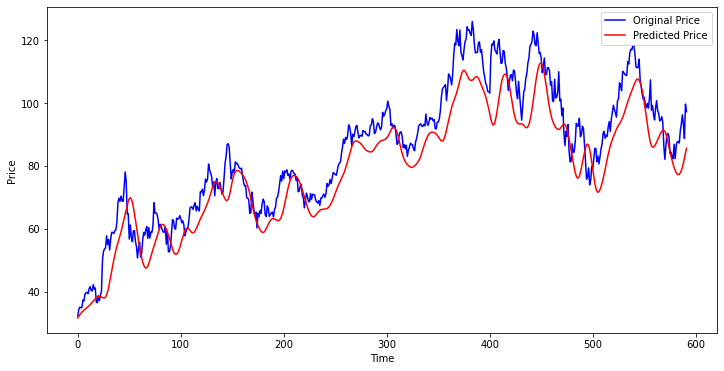

In [108]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()